In [1]:
from google.colab import drive

In [2]:
# Mounting the drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Changing the directory of the notebook to the drive folder
import os
os.chdir('/content/gdrive/MyDrive/Cenfri Data Science Assessment')

In [4]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Loading the dataset
df = pd.read_csv("Real-Time_Traffic_Incident_Reports.csv")
df.head()

,Traffic Report ID,Published Date,Issue Reported,Location,Latitude,Longitude,Address,Status,Status Date
0,C163BCD1CF90C984E9EDA4DBA311BCA369A7D1A1_15288...,06/13/2018 06:35:59 AM +0000,Crash Service,"(30.283797,-97.741906)",30.283797,-97.741906,W 21ST ST & GUADALUPE ST,ARCHIVED,06/13/2018 09:00:03 AM +0000
1,6B20382196FB454E9FD06A33E60142902A2F0706_15288...,06/13/2018 10:15:36 AM +0000,Traffic Hazard,"(30.339593,-97.700963)",30.339593,-97.700963,400-717 E ANDERSON LN EB,ARCHIVED,06/13/2018 11:20:03 AM +0000
2,2A7A84FC69D56A2C379C274D2F0831442D3E7B8E_15871...,04/17/2020 09:25:03 PM +0000,Crash Urgent,"(30.329455,-97.638105)",30.329455,-97.638105,E US 290 HWY SVRD EB & EASTERN HEIGHTS BLVD,ARCHIVED,04/17/2020 09:55:03 PM +0000
3,89D3B75BB5932F10D25B5852A9902DA26C3DF11A_15871...,04/17/2020 09:40:52 PM +0000,Traffic Hazard,"(30.202806,-97.760701)",30.202806,-97.760701,5300-blk S Ih 35 Sb,ARCHIVED,04/17/2020 09:55:03 PM +0000
4,E7F9EFF0E81057A5C8FE41CABE4D9C6EEA82DAA0_15871...,04/17/2020 09:00:55 PM +0000,Crash Urgent,"(30.184265,-97.687339)",30.184265,-97.687339,4500-4720 S Us 183 Hwy Sb,ARCHIVED,04/17/2020 11:30:04 PM +0000


In [6]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257651 entries, 0 to 257650
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Traffic Report ID  257651 non-null  object 
 1   Published Date     257651 non-null  object 
 2   Issue Reported     257651 non-null  object 
 3   Location           257092 non-null  object 
 4   Latitude           257572 non-null  float64
 5   Longitude          257572 non-null  float64
 6   Address            257651 non-null  object 
 7   Status             255958 non-null  object 
 8   Status Date        257651 non-null  object 
dtypes: float64(2), object(7)
memory usage: 17.7+ MB


**Observations:** After having a look into the dataset, it is evident that the dataset contains information about traffic issue reported

## **Phase 1: Understanding & Cleaning data** 

In [7]:
# Looking for missing values
for col in df.columns:
  missing = len(df[df[col].isnull()])
  if missing > 0:
    print("Column ", col, " has: ", missing, " missing values")

Column  Location  has:  559  missing values
Column  Latitude  has:  79  missing values
Column  Longitude  has:  79  missing values
Column  Status  has:  1693  missing values


**Dealing with missing values**

In [8]:
# Checking the location column
df['Location'][:5]

0    (30.283797,-97.741906)
1    (30.339593,-97.700963)
2    (30.329455,-97.638105)
3    (30.202806,-97.760701)
4    (30.184265,-97.687339)
Name: Location, dtype: object

Given that the information in the location, latitude, and longitude columns are just coordinates that might not highly contribute to the analysis, I will drop the 3 columns and instead use the address column.

In [9]:
# Dropping the location, latitude, and longitude columns
df = df.drop(['Location', 'Latitude', 'Longitude'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257651 entries, 0 to 257650
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Traffic Report ID  257651 non-null  object
 1   Published Date     257651 non-null  object
 2   Issue Reported     257651 non-null  object
 3   Address            257651 non-null  object
 4   Status             255958 non-null  object
 5   Status Date        257651 non-null  object
dtypes: object(6)
memory usage: 11.8+ MB


In [10]:
# Checking values in the status columns
df['Status'].value_counts()

ARCHIVED    255955
ACTIVE           3
Name: Status, dtype: int64

Given that the number of missing values in the Status columns are 1693 compared to 255958 values, we can delete all null values in the column

In [11]:
# Deleting all null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255958 entries, 0 to 257650
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Traffic Report ID  255958 non-null  object
 1   Published Date     255958 non-null  object
 2   Issue Reported     255958 non-null  object
 3   Address            255958 non-null  object
 4   Status             255958 non-null  object
 5   Status Date        255958 non-null  object
dtypes: object(6)
memory usage: 13.7+ MB


In [12]:
# Resetting the indexes
df = df.reset_index()

Since our data don't have missing values, we can start the analytics phase

## **Phase 2: Data Analysis**

**In this section, I'll come up with analytical questions from the dataset and answer them using data analysis and visualization techniques**

### *Question 1: What are the top 5 most recurring traffic issues reported*

In [13]:
# Looking for top 5 most recurring traffic issues
most_traffic_issues = df['Issue Reported'].value_counts().sort_values(ascending=False)[:5]
most_traffic_issues

Traffic Hazard       78953
Crash Urgent         60521
Crash Service        38158
COLLISION            22789
TRFC HAZD/ DEBRIS    17991
Name: Issue Reported, dtype: int64

[]

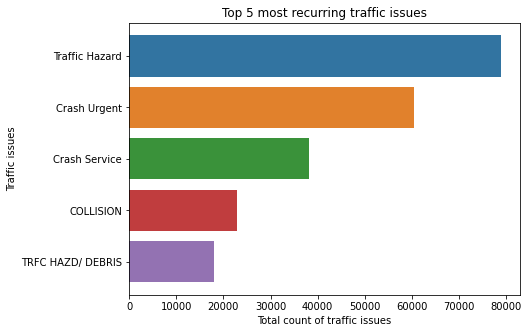

In [14]:
# Visualizing the top 5 most recurring traffic issues
plt.figure(figsize=(7,5))
plt.title("Top 5 most recurring traffic issues")
sns.barplot(y = most_traffic_issues.index, x = most_traffic_issues.values)
plt.xlabel("Total count of traffic issues")
plt.ylabel("Traffic issues")
plt.plot()

From the chart above, we can see that traffic harzard is the most common traffic issue reported compared to other

### *Question 2: What is the address with many recorded traffic issues*

In [15]:
# Looking for addresses where many issues were reported
df['Address'].value_counts().sort_values(ascending=False)[:1]

E Parmer Ln & Dessau Rd    184
Name: Address, dtype: int64

Over 184 traffic issues were reported in E Parmer & Dessau Rd. This is the most of all other addresses.

### *Question 3: What are the most common traffic issues in E Parmer & Dessau Rd*

In [16]:
# Looking for common traffic issues recorded in the address with many traffic cases
issues = df[df['Address'] ==  'E Parmer Ln & Dessau Rd']
common_issues = issues['Issue Reported'].value_counts()
common_issues

Crash Urgent          76
Traffic Hazard        67
Crash Service         28
Traffic Impediment     5
zSTALLED VEHICLE       3
COLLISION              2
Stalled Vehicle        2
VEHICLE FIRE           1
Name: Issue Reported, dtype: int64

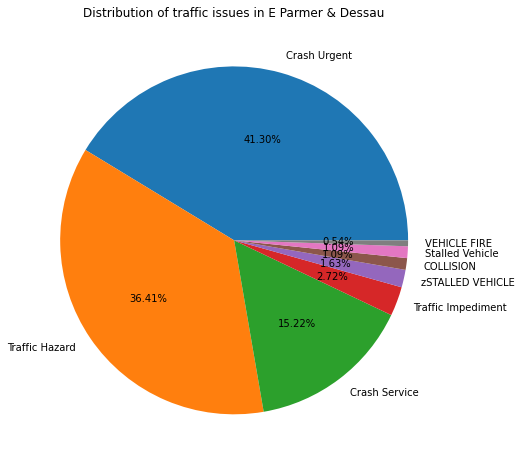

In [17]:
# Visualizing the distribution of traffic issues in E Parmer & Dessau Rd address

labels = common_issues.index
values = common_issues.values

plt.figure(figsize=(8,8))
plt.title("Distribution of traffic issues in E Parmer & Dessau")
plt.pie(values, labels = labels, autopct='%1.2f%%')
plt.show()

From the above chart, we can spot that urgent minor crashes alongside traffic hazards are the most common traffic issues in the E Parmer & Dessau Rd, the address with the most traffic cases.

### *Question 4: At what time of the day are most of the traffic cases recorded* 

In [18]:
# Turning the published date column from object to datetime
df['Published Date'] = pd.to_datetime(df['Published Date'])

In [19]:
# Extracting hours from the published date column
hour = []
published_date = df['Published Date']
for i in range (len(df['Published Date'])):
  h = df['Published Date'][i].hour
  hour.append(h)

df['Hour'] = hour

0     13140
1     10488
2      8810
3      6916
4      5344
5      4332
6      4297
7      5340
8      4963
9      4022
10     4553
11     7253
12    11485
13    14004
14    13734
15    13444
16    14273
17    15697
18    16020
19    15113
20    14929
21    16306
22    16774
23    14721
Name: Hour, dtype: int64


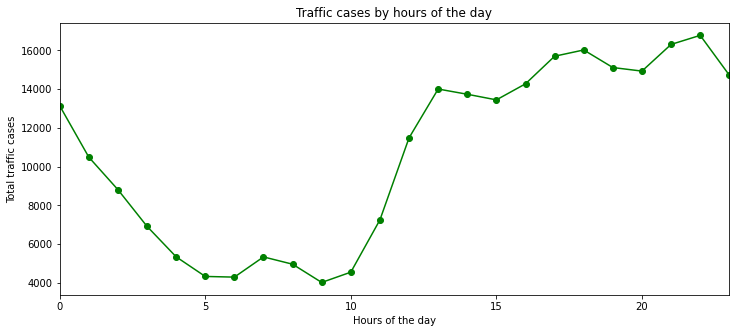

In [20]:
# Traffic cases by the hour of the day

cases_by_hour = df['Hour'].value_counts()
cases_by_hour = cases_by_hour.sort_index()
hours = cases_by_hour.index
cases = cases_by_hour.values
print(cases_by_hour)

plt.figure(figsize=(12, 5))
plt.title("Traffic cases by hours of the day")
plt.plot(hours, cases, color='g', marker = 'o')
plt.xlabel("Hours of the day")
plt.ylabel("Total traffic cases")
plt.xlim(0, 23)
plt.show()

From the chart above, we can see majority of traffic issues recorded took place between 12 PM and 1 AM. This might be due to various reasons. Let's try to uncover which case took place at which time in the next question.

### *Question 5: What is the daily distribution of the top 5 traffic cases*  

In [21]:
# Using pivot table to group by top 5 traffic cases
piv = df.pivot_table("Traffic Report ID", index="Hour", columns="Issue Reported", aggfunc='count')
piv

Issue Reported,AUTO/ PED,BLOCKED DRIV/ HWY,BOAT ACCIDENT,COLLISION,COLLISION WITH INJURY,COLLISION/PRIVATE PROPERTY,COLLISN / FTSRA,COLLISN/ LVNG SCN,Crash Service,Crash Urgent,FLEET ACC/ FATAL,FLEET ACC/ INJURY,HIGH WATER,ICY ROADWAY,LOOSE LIVESTOCK,N / HZRD TRFC VIOL,OBSTRUCT HWY,Stalled Vehicle,TRAFFIC FATALITY,TRFC HAZD/ DEBRIS,Traffic Hazard,Traffic Impediment,VEHICLE FIRE,zSTALLED VEHICLE
Hour,,,,,,,,,,,,,,,,,,,,,,,,
0,6.0,28.0,12.0,1301.0,334.0,38.0,NaN,273.0,1880.0,3195.0,NaN,NaN,NaN,NaN,384.0,NaN,NaN,206.0,4.0,915.0,3915.0,143.0,46.0,460.0
1,4.0,21.0,11.0,1026.0,328.0,28.0,NaN,245.0,1438.0,2458.0,NaN,3.0,NaN,NaN,294.0,1.0,1.0,185.0,5.0,767.0,3092.0,118.0,36.0,427.0
2,1.0,25.0,8.0,869.0,258.0,9.0,1.0,228.0,1162.0,2234.0,NaN,1.0,NaN,1.0,201.0,NaN,NaN,171.0,4.0,630.0,2431.0,118.0,32.0,426.0
3,2.0,14.0,2.0,642.0,214.0,13.0,NaN,138.0,871.0,1740.0,NaN,1.0,NaN,1.0,152.0,1.0,NaN,215.0,4.0,454.0,1916.0,84.0,28.0,424.0
4,NaN,10.0,3.0,511.0,171.0,13.0,NaN,116.0,674.0,1314.0,NaN,2.0,NaN,2.0,131.0,1.0,1.0,195.0,5.0,338.0,1398.0,57.0,20.0,382.0
5,NaN,11.0,NaN,445.0,137.0,5.0,NaN,100.0,502.0,1087.0,NaN,NaN,NaN,2.0,118.0,NaN,NaN,139.0,1.0,254.0,1106.0,88.0,31.0,306.0
6,1.0,8.0,1.0,448.0,175.0,4.0,NaN,86.0,509.0,1046.0,NaN,1.0,NaN,5.0,108.0,NaN,NaN,103.0,8.0,270.0,1145.0,105.0,28.0,246.0
7,3.0,3.0,NaN,541.0,192.0,8.0,NaN,83.0,775.0,1404.0,NaN,2.0,NaN,5.0,116.0,NaN,NaN,82.0,4.0,291.0,1363.0,225.0,20.0,223.0
8,1.0,7.0,2.0,442.0,133.0,7.0,NaN,104.0,693.0,1292.0,NaN,1.0,NaN,2.0,132.0,NaN,1.0,66.0,3.0,299.0,1319.0,199.0,17.0,243.0


In [22]:
# Droping all other rows and remaining with the top 5 traffic cases
# The top 5 cases were identified from the first question

piv = piv.drop(['AUTO/ PED', 'BLOCKED DRIV/ HWY', 'BOAT ACCIDENT',
       'COLLISION WITH INJURY', 'COLLISION/PRIVATE PROPERTY',
       'COLLISN / FTSRA', 'COLLISN/ LVNG SCN','FLEET ACC/ FATAL', 
       'FLEET ACC/ INJURY', 'HIGH WATER', 'ICY ROADWAY',
       'LOOSE LIVESTOCK', 'N / HZRD TRFC VIOL', 'OBSTRUCT HWY',
       'Stalled Vehicle', 'TRAFFIC FATALITY',
       'Traffic Impediment', 'VEHICLE FIRE',
       'zSTALLED VEHICLE'], axis=1)

piv

Issue Reported,COLLISION,Crash Service,Crash Urgent,TRFC HAZD/ DEBRIS,Traffic Hazard
Hour,,,,,
0,1301.0,1880.0,3195.0,915.0,3915.0
1,1026.0,1438.0,2458.0,767.0,3092.0
2,869.0,1162.0,2234.0,630.0,2431.0
3,642.0,871.0,1740.0,454.0,1916.0
4,511.0,674.0,1314.0,338.0,1398.0
5,445.0,502.0,1087.0,254.0,1106.0
6,448.0,509.0,1046.0,270.0,1145.0
7,541.0,775.0,1404.0,291.0,1363.0
8,442.0,693.0,1292.0,299.0,1319.0


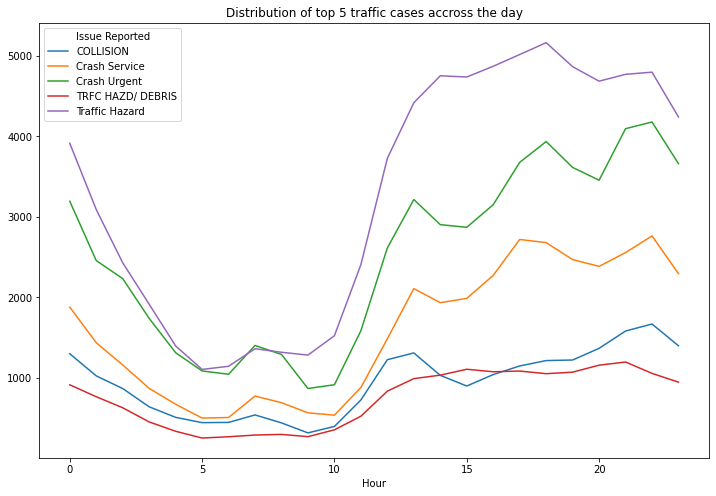

In [23]:
# Visualizing the distribution of top 5 traffic cases accross the day
piv.plot(figsize=(12, 8), title="Distribution of top 5 traffic cases accross the day")

From the chart above, we can see the variation in the amount of traffic cases recorded by differnet hours of the day. 

## **End of the Analysis** 